### Problem 1



(a): We would generally expect a flexible model to perform better in the case of a large sample size with a small number of predictors.
When the sample size is extremely large, the liklihood of noise or outliers affecting the data and causing overfitting lowers, as more observations helps the model better recognize the actual trends rather than be influenced by noise. This is positive for a flexible model, which comes with the risk of overfitting.
As well, a small number of predictors helps lower the complexity of the dataset, as there are less variables to fit to. Less variables lowers the potential for noise or outliers, which as explained earlier, is one of the main concerns of using a flexible model. 
In summary, a large n and small b both help contribute to controlling noise in the model, which manages the risk of a flexible model overfitting to the data. For this reason, we can expect a flexible model to perform better compared to an inflexible model. 

(b) An inverse to question (a), p is extremely large and n is small. Following the same logic from (a) but for an inverse situation, we can expect an inflexible model to perform better.

When the sample size is small, the data is more likely to be influenced by noise or outliers. This is because there are overall less data points, so any outlier will hold more influence over the model. This is less devestating in an inflexible model, which runs less risk of overfitting to noise. 

As well, when the number of predictors is large, the model will become increasingly complex, as each variable must be considered when fitting to the data. Along with the limited amount of samples, a flexible model may try to compensate for the large number of predictors and attempt to identify trends that are not actually true. A flexible model is more likely to be influenced by a high number of predictors and attempt to discern meanings of trends that do not exist.

In summary, an inflexible model would generally perform better, as it would run less risk of overtfitting to outliers in the small sample set, and would be more constrained when evalauating the extremely large number of predictors in the data set.

(c) A flexible model would generally perform better for this situation. If the predictors (input variables) lead to a generally non-linear response, then a model that identifies this relationship is neccessary. A flexible model that generalizes to data is neccessary here, as it would more likely capture the curved or complex patters in the data. Flexible models are more suited to intricate or complex relationships, such as a "highly non-linear" relationship.
Thus, a flexible mdoel should be used. 

### Problem 2

# K nearest neighbors


In [1031]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import seaborn as sns
import copy

In [1032]:
d1 = [[23.09,20], [22.11, 10.5], [22.74, 8.4], [23.6, 11.3], [24.16, 14], [24.39, 8.3], [25.68, 9.7],[26.4, 17.2], [26.82, 13.4], [29.68, 8.1], [23.6, 11.4] ]
df_medv = pd.DataFrame(columns=["lsat", "medv"], data=d1)
df_medv

,lsat,medv
0,23.09,20.0
1,22.11,10.5
2,22.74,8.4
3,23.60,11.3
4,24.16,14.0
5,24.39,8.3
6,25.68,9.7
7,26.40,17.2
8,26.82,13.4
9,29.68,8.1


In [1033]:
def KNN(x0, k, data):
    data_copy = copy.deepcopy(data)
    count = 0
    KNN_sum = 0
    while count < k: # number of neighbors
        best_dist = float('inf')
        best = None
        for each in data_copy:
            if abs(each[0] - x0) < best_dist:
                best = each
                best_dist = abs(each[0] - x0)
                
        KNN_sum += best[1]
        data_copy.remove(best)        
        count += 1
    KNN_avg = KNN_sum / k

    return KNN_avg


# Problem 2, (a) and (b)

In [1034]:
print(KNN(25, 1, d1))
# The medv when lstat = 25 and K = 1 is 8.3

print(KNN(25, 5, d1))
# The medv when lstat = 25 and K = 5 is 12.1

print(KNN(27, 1, d1))
# The medv when lstat = 27 and K = 1 is 13.4

print(KNN(27, 5, d1))
# The medv when lstat = 27 and K = 5 is 11.34

8.3
12.1
13.4
11.34


# Problem 2, (c) and (d)

In [1035]:
d2 = [[23.09,2], [22.11, 1], [22.74, 0], [23.6, 1], [24.16, 2], [24.39, 0], [25.68, 0],[26.4, 2], [26.82, 1], [29.68,0], [23.6, 1]]
df_medv_cat = pd.DataFrame(columns=["lsat", "medv_cat"], data=d2)
df_medv_cat

,lsat,medv_cat
0,23.09,2
1,22.11,1
2,22.74,0
3,23.60,1
4,24.16,2
5,24.39,0
6,25.68,0
7,26.40,2
8,26.82,1
9,29.68,0


In [1036]:
print(KNN(25, 1, d2))
# The medv when lstat = 25 and K = 1 is 0

print(KNN(25, 5, d2))
# The medv when lstat = 25 and K = 5 is 1.0

print(KNN(27, 1, d2))
# The medv when lstat = 27 and K = 1 is 1.0

print(KNN(27, 5, d2))
# The medv when lstat = 27 and K = 5 is 0.6

0.0
1.0
1.0
0.6


# Problem 2, (e) and (f)
(e): Increasing the K, or number of neighbors in a KNN reduces the flexibility of a model. This is because as the number of neighbors increases, there are more data points to be considered. This reduces the model's sensitivity to specific data points. Although this reduces the model's chance of overfitting to noise, the overall flexibility of the model is lost as the variance is increased. 

(f) As K is increased, the flexibility of the model is reduced, as explained above. Consequence to this, variance increases (increasing k makes the model more sensitive which increases variance). Increasing K also lowers bias as the model is overfitting to the trends by exploring more neighbors, which brings the predicted values closer to the actual values, assuming variance is not too high.

The same holds true for the square of bias and square of variance: as K increases, square of variance increases, and square of biases decreases. 

Training MSE is how far the the predicted values are from the actual values from the training set, i.e. how well the model fits the data it was trained on.

With a very low k, the mode is very flexible, as there is a high sensitivity to the closest neighbors. MSE for training data is low when k is low. As k increases, the MSE on the training data also increases. This is because more neighbors are considered, the predicted value deviates further from the actual value. 

For test MSE, with a very low k, the model is very flexible and prone to overfitting, which can cause test MSE due to disparities in values between the training and test data. As k grows and becomes more moderate, this liklihood of overfitting decreases, as the flexibility of the model decreases. This causes test MSE to lower. However, as k becomes increasingly large, the model loses flexibility and may begin to lose any nuance in the training data. This will cause increases in test MSE, as any complexities in the model are lost. 

Changing the k in KNN regression does NOT affect irreducible error. Irreducible error is, by definition, error that cannot be reduced, and is a product of the data's limitatons, such as measurement error, unobserved variables, and natural variability in the data.

Therefore, changing K does not change the irreducible error.

# Problem 3

### Problem 3 (a)
In this dataset, the number of observations is 100 (the sample size)
The model used to generate the data is defined by y = x^5 -2x^4 + x^3

There are 3 different powers of x, so there are 3 different features.


### Problem 3 (b), (c)

In [1037]:
predictions = {}

for d in range(16):
    predictions[d] = []

predictions

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: []}

In [1038]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

for repeat in range(250):

    def f(x):
        return x ** 5 - 2 * x ** 4 + x ** 3

    def get_sim_data(f, sample_size=100, std=0.01):
        x = np.random.uniform(0, 1, sample_size)
        y = f(x) + np.random.normal(0, std, sample_size)
        df = pd.DataFrame({'x': x, 'y': y})
        return df

    df = get_sim_data(f)
    df
    x = df['x'].values.reshape(-1,1)
    y = df['y'].values

    y0_predictions = []

    for d in range(16): # degrees 0 to 15
        poly = PolynomialFeatures(degree=d)
        poly_features = poly.fit_transform(x)

        model = LinearRegression()
        model.fit(poly_features, y)

        x0 = np.array([[0.18]])
        x0_poly = poly.transform(x0)
        y0_pred = model.predict(x0_poly)
        
        predictions[d].append(y0_pred)
    

   





### Problem 3 (e), (f), (g), (h)

In [1039]:
 # Bias = true value - mean(predictions)
bias_squared_array = []
variance_array = []
irreducible_error_array = []
MSE_array = []

x0 = 0.18
actual_value = f(x0)
for d in range(16):

    current_array = predictions[d]
    mean = sum(current_array) / len(current_array)

    # bias squared = true value - mean(predictions)
    #(e)
    bias_squared = (actual_value - mean) ** 2 

    bias_squared_array.append(bias_squared)
    
    #(f)
    # variance = 1/n * (sum from i to n for (xi - mean)) squared
    variance = 1/len(current_array) * (sum((x - mean) ** 2 for x in current_array))
    variance_array.append(variance)

    # (g)
    std = 0.01 # from prior data generation
    irreducible_error = std ** 2
    irreducible_error_array.append(irreducible_error)

    # (h)
    MSE = bias_squared + variance + irreducible_error
    MSE_array.append(MSE)





### Problem 3 (i)

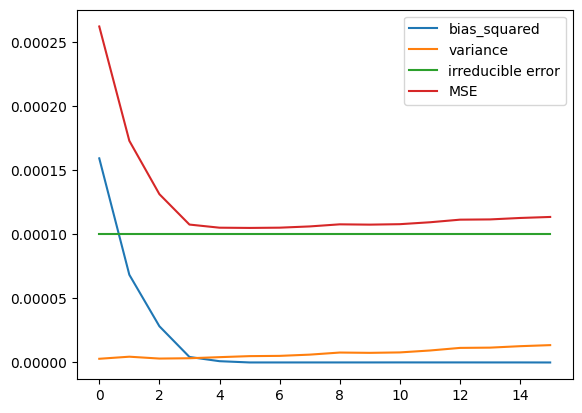

In [1040]:
degrees = [i for i in range(0, 16)]
plt.plot(degrees, bias_squared_array, label = "bias_squared")
plt.plot(degrees, variance_array, label = "variance")
plt.plot(degrees, irreducible_error_array, label = "irreducible error")
plt.plot(degrees, MSE_array, label = "MSE")
plt.legend()
plt.show()


Irreducible error does not change, which is to be expected as it was just calculated as a the standard deviation of the data generation, squared. I am unsure if this process was correct.

MSE and bias squared start very high at the lowest degrees and then quickly falls as the degree increases. MSE slowly rises as the degree is raised after 3, while bias_squared does not change much at all, although it continues to descend after the 3rd degree.

Variance slowly rises as the degree is increased. 

The bias variance trade off is visualized here, where as the complexity of the model increases, bias squared decreases, but at the expense of variance, which increases.
It seems that there is a sweet spot of trade off at the third polynomial, which both variance and bias are most minimized (which is also indicated by a minimized MSE)

### Problem 4

In [1041]:
# Problem 4 (a)
def f(x):
    return x ** 5 - 2 * x ** 4 + x ** 3

np.random.seed(123)
x = np.random.uniform(0, 1, size=500)
y = f(x) + np.random.normal(0, 0.01, size=500)


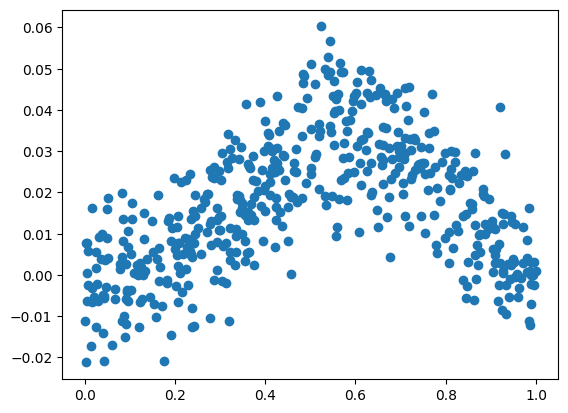

In [1042]:
# Problem 4 (b)
df = pd.DataFrame({'x':x,'y':y})
import matplotlib.pyplot as plt
plt.scatter(x,y)

If a model were to be fit to the data, it would likely be parabolic, in that when x is low, y is low. As x increases, so does y, up to about  x=0.6, which is about where the parabola crosses its axis of symmetry, and y decreases as x increases.


In [1043]:
# Problem 4 (c)
# Imports 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from ISLP.models import sklearn_sm

def f(x):
    return x ** 5 - 2 * x ** 4 + x ** 3


def get_cv(rand_seed):
    np.random.seed(rand_seed)
    x = np.random.uniform(0, 1, size=500)
    y = f(x) + np.random.normal(0, 0.01, size=500)
    df = pd.DataFrame({'x':x,'y':y})

    cv_error = np.zeros(7)
    H = np.array(df['x'])
    Y = np.array(df['y']) 
    M = sklearn_sm(sm.OLS)

    for i, d in enumerate(range(1,8)): # test poly degree of 1 to 7
        X = np.power.outer(H, np.arange(d+1))
        M_CV = cross_validate(M, X, Y, cv=df.shape[0])
        cv_error[i] = np.mean(M_CV['test_score'])
    return cv_error

cv_error_1 = get_cv(rand_seed=123)
print(f"cv_error with seed 123: {cv_error_1}")
cv_error_2 = get_cv(rand_seed=12345)
print(f"cv_error with seed 12345: {cv_error_2}")

cv_error with seed 123: [0.00023873 0.00012611 0.00011088 0.00010574 0.00010461 0.00010463
 0.000105  ]
cv_error with seed 12345: [2.21142155e-04 1.13711761e-04 1.00571190e-04 9.74069564e-05
 9.26890930e-05 9.30073091e-05 9.33575799e-05]


# Problem 4 (d)
The cv error with seed 123 and seed 12345 are not the same. This is to be expected, because the seeds define the "randomly" selected numbers that make up the data set, and the data set defines what the cv error will be. Changing the seed used in np.random.seed will change the number that is returned, and different datasets will have different cv errors. 


In [1047]:
print(min(cv_error_1))

0.00010460992336824848


# Problem 4 (e)
The smallest cv error was 0.00010460992336824848, which was the 5th degree polynomial model. This is expected, as our original function used to define the data set was f(x)= x ** 5 - 2 * x ** 4 + x ** 3, which is a 5th degree polynomial. 

It would then logically follow that the model that best fits the true function of the dataset, is on the same exponential power (the 5th degree). 

LOOCV is indicative of overall lower error in the model, which is a better fit. Although there are other metrics for best fit and there is always the risk of overfitting, a lower CV is a good indication that the model performed well when training, and will do well for making prediction on new data. Lower CV equals a better fit.

We would expect the best fit at the 5th degree, and this expecation is correctly reflected by the result found above. 


Coefficient Estimates: [ 0.          0.04354386 -0.17195819  1.26327853 -2.17802659  1.04589559]
Intercept: -0.0025346275683039224


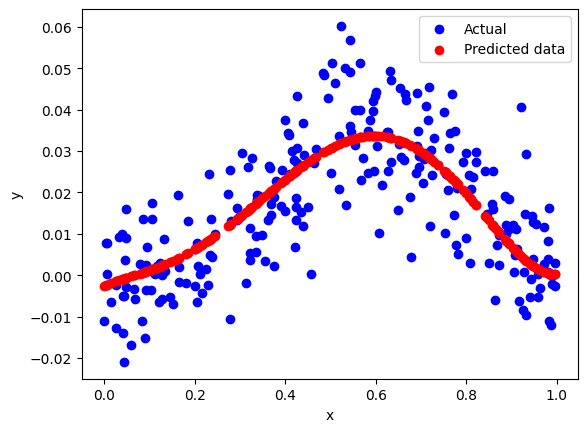

In [1064]:
# Problem 4 (f)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def f(x):
    return x ** 5 - 2 * x ** 4 + x ** 3

seed = 123
np.random.seed(seed)
x = np.random.uniform(0, 1, size=500)
y = f(x) + np.random.normal(0, 0.01, size=500)
df = pd.DataFrame({'x':x,'y':y})

data_train, data_test = train_test_split(df, test_size = 250, random_state=seed)

# Reshape the training data
x_train = data_train["x"].values.reshape(-1,1)
y_train = data_train["y"].values

# Reshape the testing data
x_test = data_test["x"].values.reshape(-1, 1)
y_test = data_test["y"].values

poly = PolynomialFeatures(degree=5)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model = LinearRegression() # LinearRegression() uses least squares by default
model.fit(x_train_poly, y_train)

y_pred = model.predict(x_test_poly)

coefficients = model.coef_
print("Coefficient Estimates:", coefficients)

plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted data')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


The coefficient estimates do indeed make logical sense. 
The 3rd, 4th, and 5th degree coefficients all have absolute values greater than 1, indicating a greater impact on the model than the 1st and 2nd degree coefficients. This is to be expected, because the function used to randomly generate this data was f(x) = x ** 5 - 2 * x ** 4 + x ** 3, which has 3 features, in the 5th, 4th, and 3rd degree.

The 5th degree and 3rd degree coefficients are positive, and the 4th degree coefficient is negative, which directly aligns with the signage (+ or -) of each feature in the data generation function.

Regarding statistical significane, the 4th degree polynomial seems to ahve the greatest effect on the data, as it has the greatest abolute value for its coefficient, indicating the greatest impact on the data.

i